<a href="https://colab.research.google.com/github/ADRIANVM117/ENSAYOS/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica!

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [ ]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

# View and Clean the dataset

In [ ]:
df = penguins_df.copy()
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

### First view
-  all columns contains at least 1 nul-value


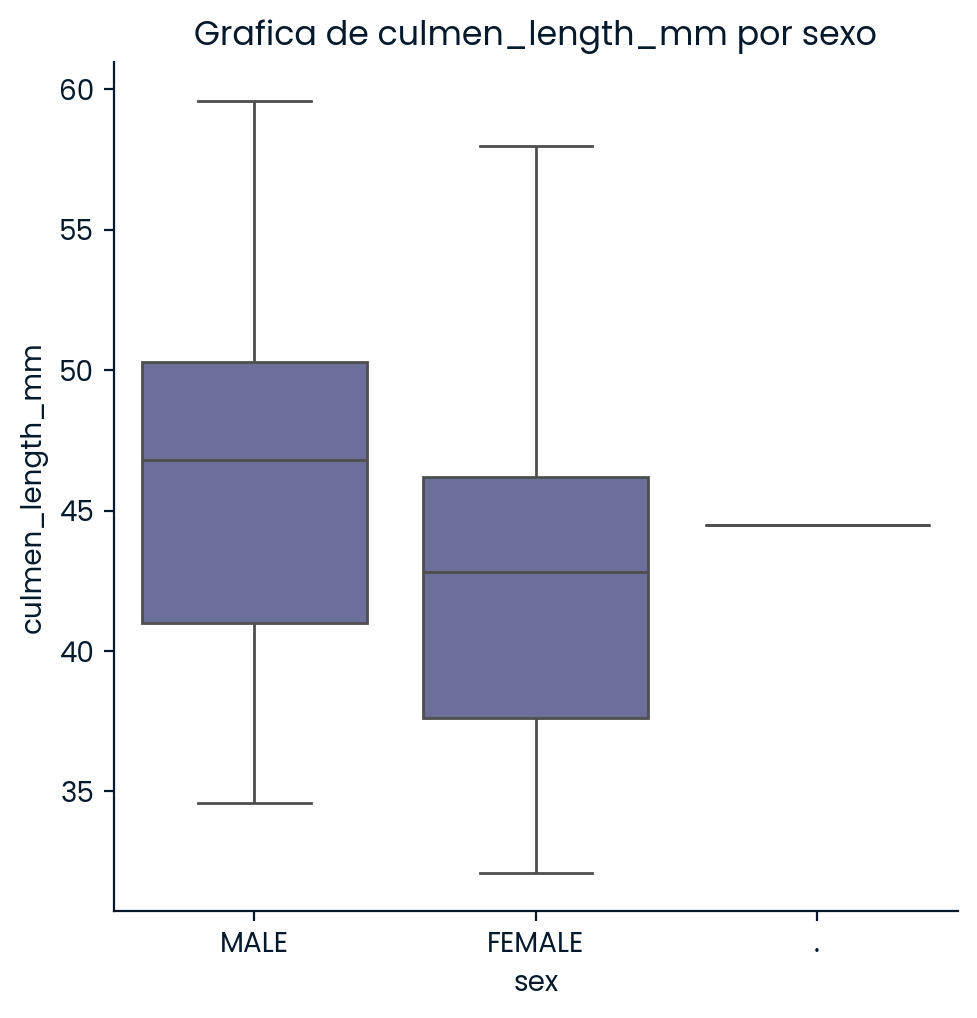

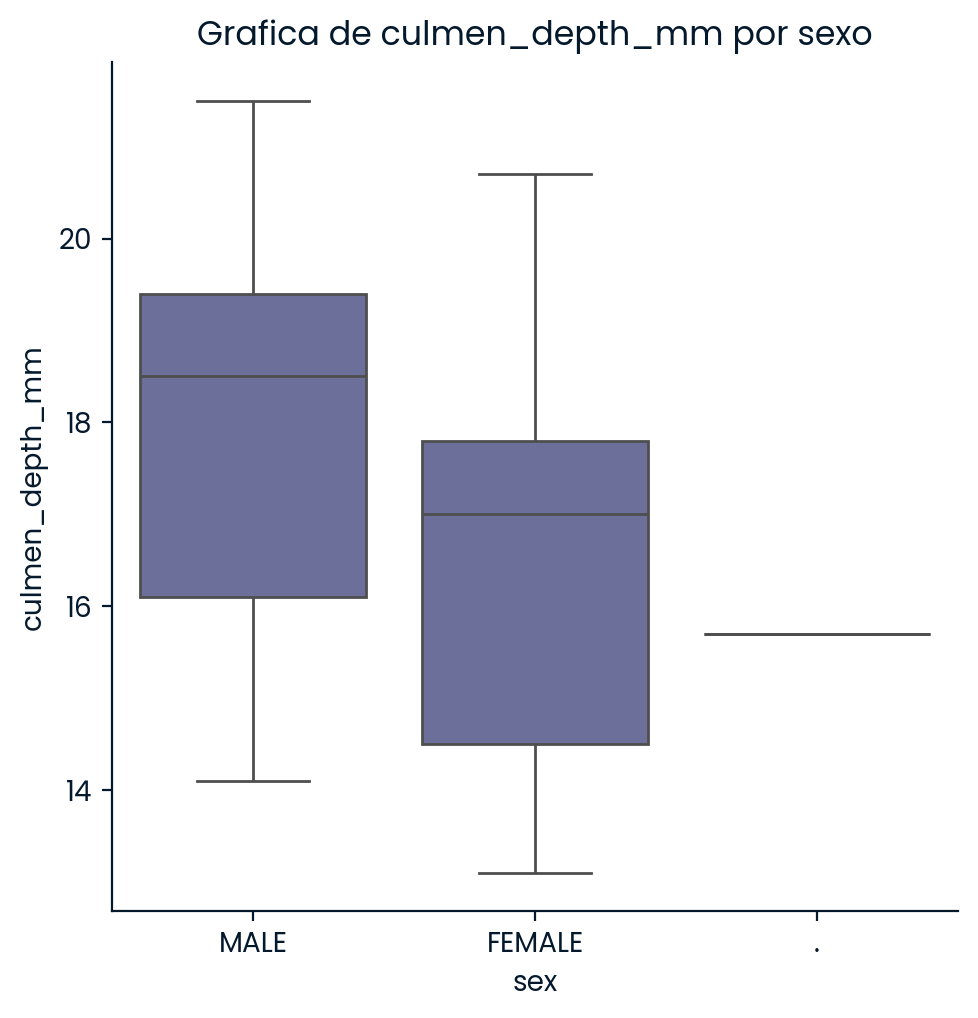

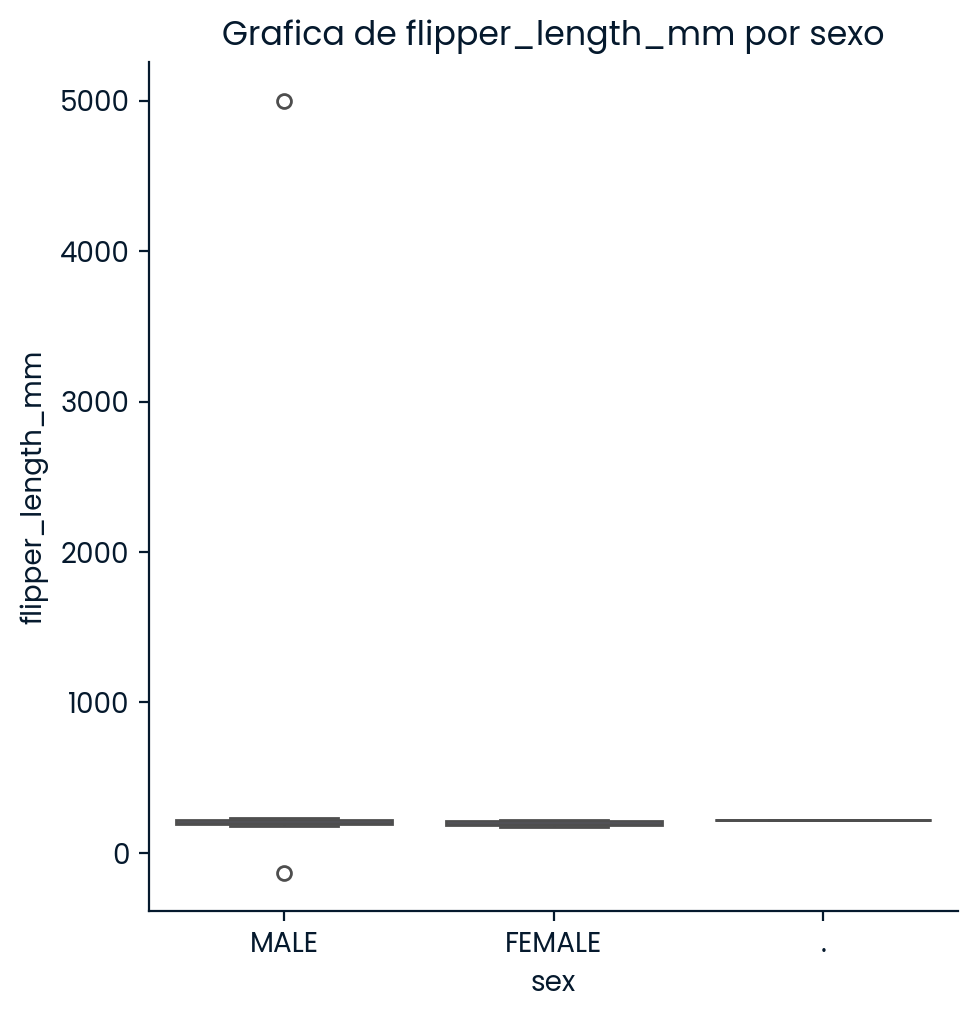

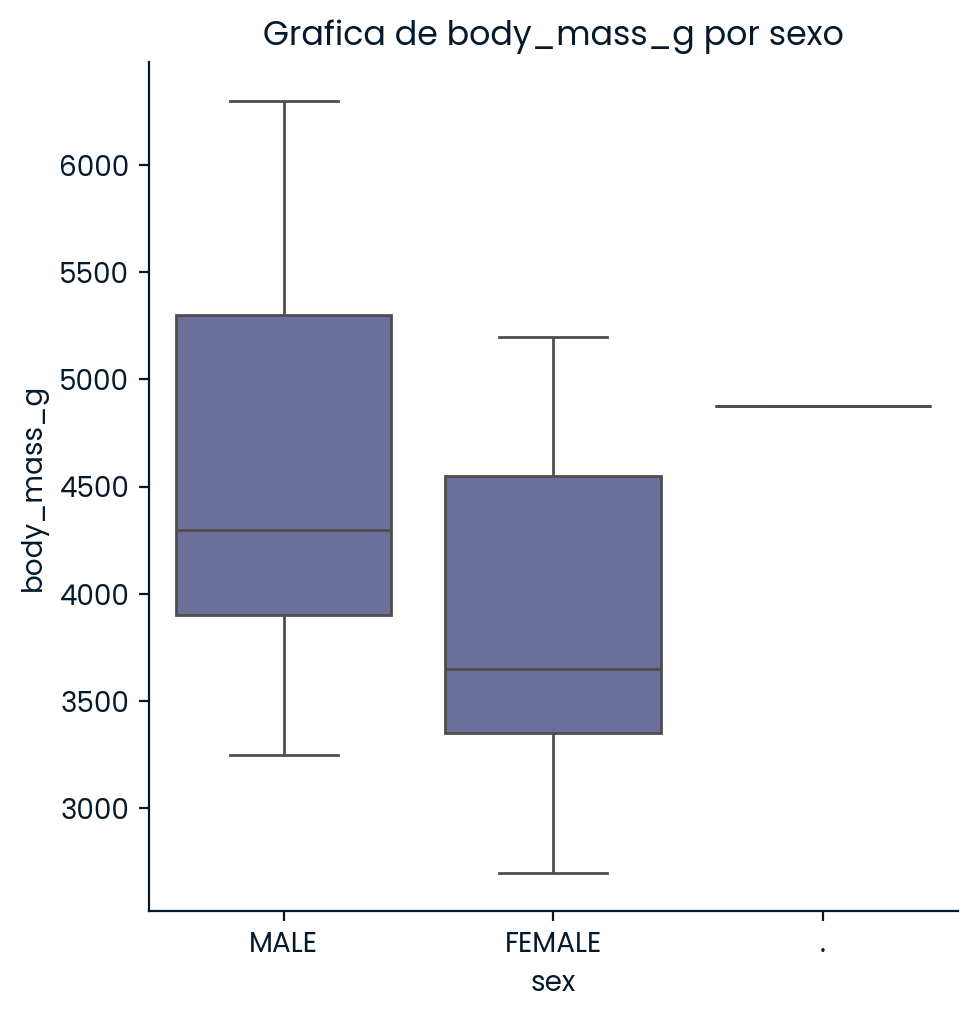

In [ ]:
import seaborn as sns
for column in df.columns:
    if column != 'sex':
        sns.catplot(data = df, x ='sex', y = column, kind = 'box')
        plt.title(f'Grafica de {column} por sexo')
        plt.show()






In [ ]:
# IQR

Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 -Q1
print(IQR)

culmen_length_mm        9.275
culmen_depth_mm         3.100
flipper_length_mm      23.750
body_mass_g          1200.000
dtype: float64


In [ ]:
# Define los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica los valores atípicos en cada columna
outliers = (df < lower_bound) | (df > upper_bound)

# Imprime el DataFrame limpio
print(df_limpio)


     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0                39.1             18.7              181.0       3750.0    MALE
1                39.5             17.4              186.0       3800.0  FEMALE
2                40.3             18.0              195.0       3250.0  FEMALE
3                 NaN              NaN                NaN          NaN     NaN
4                36.7             19.3              193.0       3450.0  FEMALE
..                ...              ...                ...          ...     ...
339               NaN              NaN                NaN          NaN     NaN
340              46.8             14.3              215.0       4850.0  FEMALE
341              50.4             15.7              222.0       5750.0    MALE
342              45.2             14.8              212.0       5200.0  FEMALE
343              49.9             16.1              213.0       5400.0    MALE

[342 rows x 5 columns]


In [ ]:
penguins_clean = penguins_df.dropna()
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean = penguins_clean.drop([9,14])


# Pre-process the cleaned data using standard scaling and the one-hot encoding to add dummy variables

In [ ]:
# apply one-hot
# Step 3 - Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)


# Scale the data

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


# PCA()

In [ ]:
# Inicializar PCA
pca = PCA(n_components = None)

# Aplicar PCA al conjunto de datos preprocesado
pca.fit(penguins_preprocessed)

# Obtener la proporción de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Encontrar el número de componentes con una proporción de varianza explicada superior al 10%
n_components = (explained_variance_ratio > 0.10).sum()

# Ejecutar PCA con el número de componentes determinado
penguins_pca = PCA(n_components=n_components).fit_transform(penguins_preprocessed)


# K-MEANS PT. 1

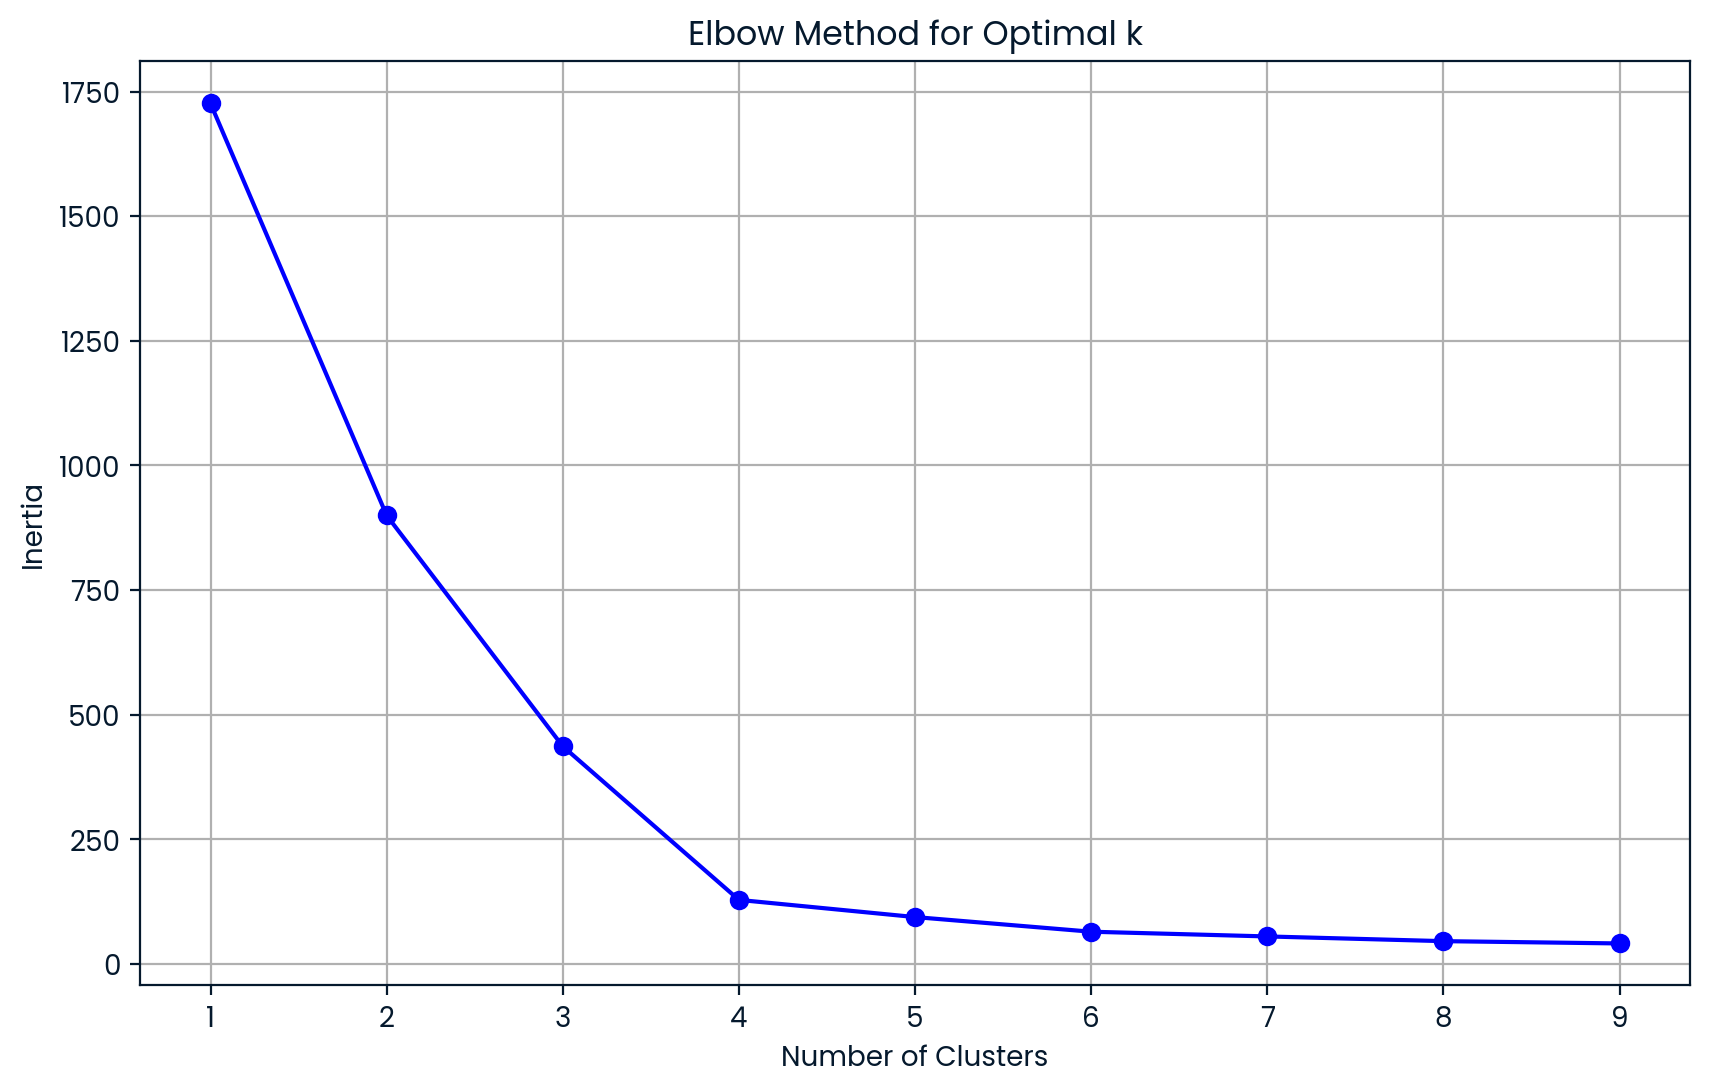

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Inicializar una lista vacía para almacenar los valores de inercia (within-cluster sum of squares)
inertia = []

# Rango de número de clusters que queremos probar
k_range = range(1, 10)

# Iterar sobre el rango de número de clusters
for k in k_range:
    # Inicializar el modelo KMeans con el número de clusters actual
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Ajustar el modelo a los datos
    kmeans.fit(penguins_pca)
    # Calcular y guardar la inercia del modelo
    inertia.append(kmeans.inertia_)

# Graficar la curva de la inercia en función del número de clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Determinar el número óptimo de clusters mediante el análisis del codo
# Aquí puedes utilizar visualmente el gráfico para identificar el punto donde la curva forma un "codo"
# y seleccionar ese número como el número óptimo de clusters.
n_clusters = 4  # Esto es un ejemplo, debes seleccionar el valor adecuado basándote en la gráfica


# K-MEANS PT. 2


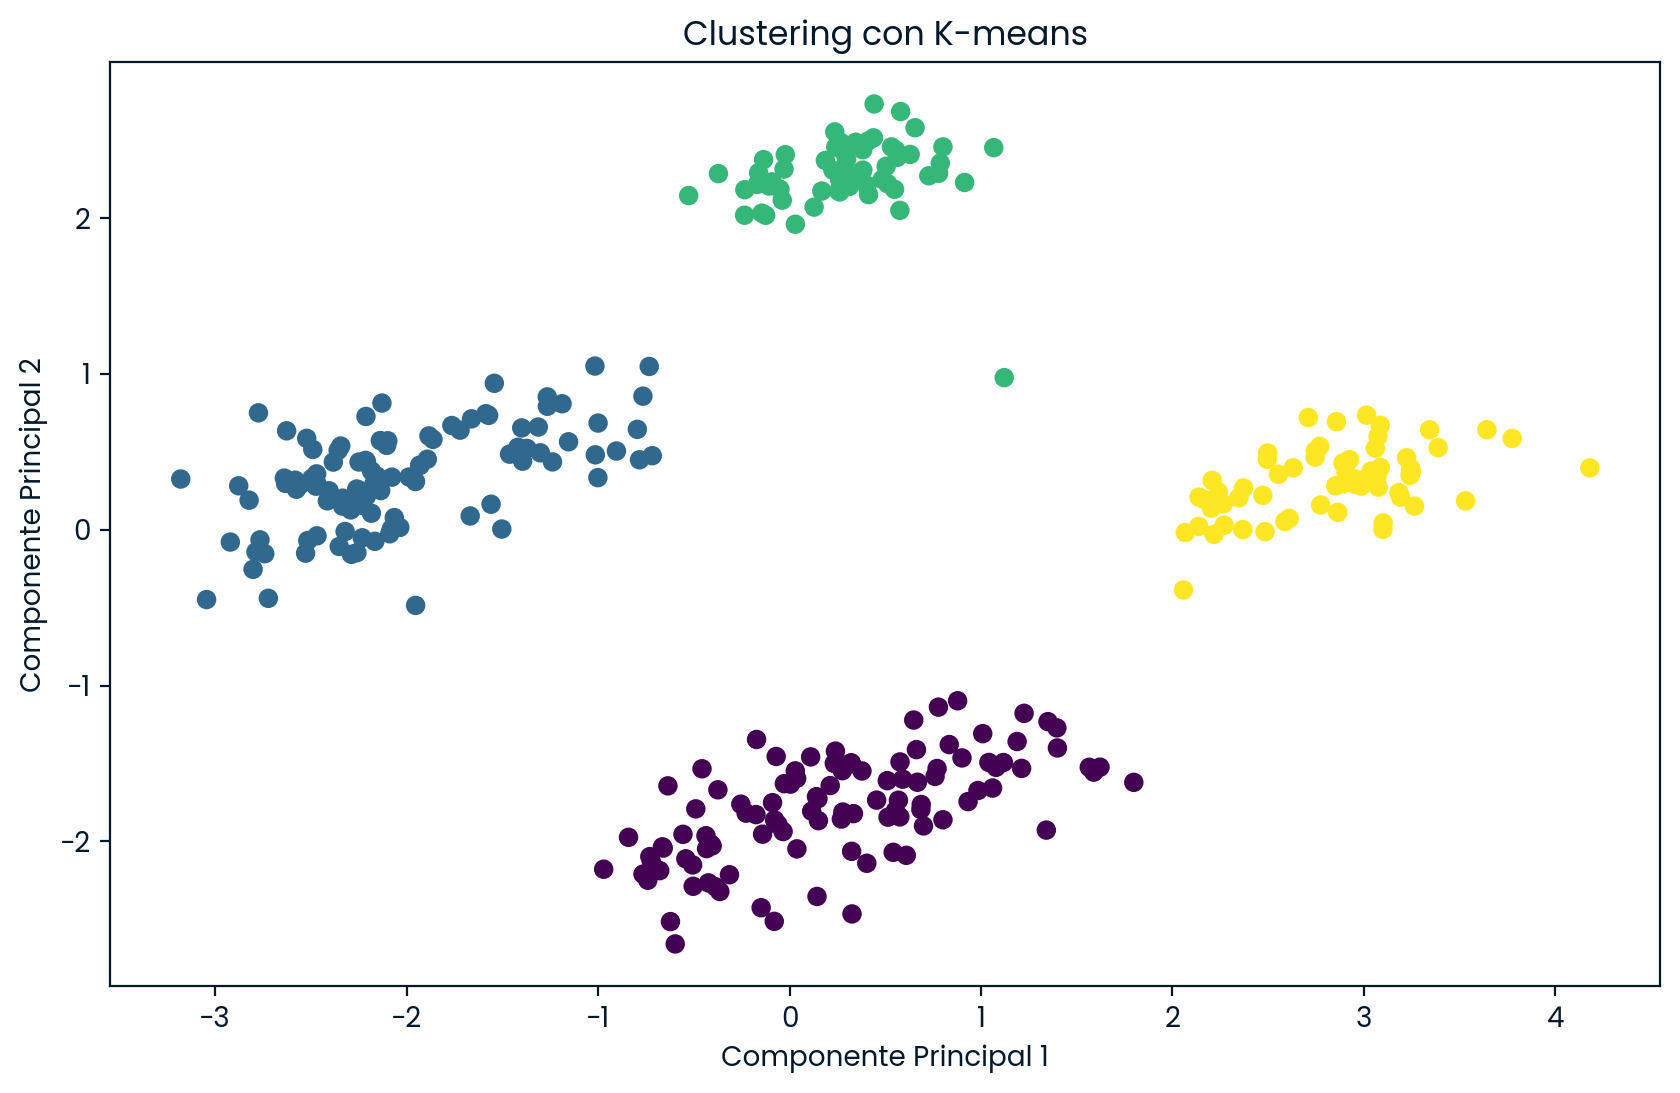

In [ ]:
# Crear y ajustar un nuevo modelo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(penguins_pca)
# Visualizar los clusters usando los dos primeros componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(penguins_pca[:, 0], penguins_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


# K-MEANS PT. 3

In [ ]:
# Agregar la columna de etiquetas al DataFrame penguins_clean
penguins_clean['cluster_label'] = kmeans.labels_

# Crear la tabla estadística agrupando por la columna "cluster_label" y calculando la media
stat_penguins = penguins_clean.groupby('cluster_label').mean()

# Imprimir la tabla estadística
print(stat_penguins)



               culmen_length_mm  ...  body_mass_g
cluster_label                    ...             
0                     43.878302  ...  4006.603774
1                     40.217757  ...  3419.158879
2                     45.545763  ...  4683.050847
3                     49.473770  ...  5484.836066

[4 rows x 4 columns]
